<a href="https://colab.research.google.com/github/iashyam/Computation-QM/blob/main/harmonic_osci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem:

Show that the Coherent state of Quantum Harmonic oscillator and the expactation value of postion oscillates with same frequency as the classical oscillator.

### Step1: Dimessional Analysis

The potential in this problem is:

>$V(x) = \frac{1}{2}m\omega^2x^2$

The Schrodinger Equation is
\begin{equation}
i\frac{\partial \Psi}{\partial t} = -\frac{\hbar^2}{2m}\frac{\partial^2 \Psi}{\partial x^2} + \frac{1}{2}m\omega^2x^2\Psi
\end{equation}

>Here $\frac{\hbar \omega}{2}$ has dimessions of energy So devide the equation with this quantity then we will have the equation as 

\begin{equation}
\frac{2i}{\omega}\frac{\partial \Psi}{\partial t} = -\frac{\hbar}{m\omega}\frac{\partial^2 \Psi}{\partial x^2} + \frac{m \omega}{\hbar}x^2\Psi
\end{equation}

>Now the qunatity as $l_0 = \sqrt{\frac{\hbar}{m\omega}}$ has dimesstion as length we define dimessionless length as
$y = \frac{x}{l_0}$

The Equation is there
\begin{equation}
\frac{2i}{\omega}\frac{\partial \Psi}{\partial t} = -\frac{\partial^2 \Psi}{\partial y^2} + y^2\Psi
\end{equation}
>We have $\frac{2}{\omega}$ has natural time dimession and we also have natural wave function as $\Psi\sqrt{l_0}$
so the compelete dimessionless equation is
\begin{equation}
i\frac{\partial \Phi}{\partial \tau} = -\frac{\partial^2 \Phi}{\partial y^2} + y^2\Phi
\end{equation}

Then we descretrise the space into lattice points. Now we can write the euqation in terms of finite differences as 

\begin{equation}
i\frac{\partial \Phi}{\partial \tau} = -\frac{1}{\Delta y^2}(\phi_{i+1}+\phi_{i-1}-2\phi_{i}) + y^2\phi_i
\end{equation}

RHS can be represented as an Operator called Hamiltonian as
$$H_{i,j} = -\frac{1}{\Delta y^2}(\delta_{i+1,j}+\delta_{i-1,j}-2\delta_{i,j}) + y^2 \delta_{i,j}$$

## Time Evolution

For a given state $\Phi_0(x,0)$ we can calculate the wave funciton at any time

\begin{equation}
\Phi(x,t) = \sum_{n = 0}^{\infty}C_n \phi_n e^{-\iota E_n t}
\end{equation}

Where 

\begin{equation}
C_n = \Phi^*(x,0) \phi_n 
\end{equation}

The probablity of finding the particle will be $|\Phi(x,t)|^2$. 

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as lin
from matplotlib.animation import FuncAnimation as anim
import matplotlib.animation as animation
plt.style.use('seaborn-whitegrid')

In [ ]:
#defining constants and range
l = 6
N = 200 #number of steps
t0 = math.pi*2
xs = np.linspace(-l,l,2*N) #space descretisation
delta = xs[1]-xs[0] #lattice spacing
ts = np.arange(0,2*t0,0.01)

In [ ]:
#define functions
#potential fn for Harmonic oscillator
def V(x):
    return x**2

#kronekar delta function
def k(i,j):
    return 1 if i==j else 0

#hemiltonian function
def Hemiltonian(i,j):
    return (-1/delta**2)*(k(i+1,j)+k(i-1,j)-2*k(i,j)) +V(i*delta)*k(i,j)


In [ ]:
#Hemiltonian matrix
H = [[Hemiltonian(i,j) for i in range(-N,N)] for j in range(-N,N)]

#finding eigon values
eigen_values, eigen_vectors = np.linalg.eig(H)
idx = np.argsort(eigen_values) #sorted indeces
eigen_values = eigen_values[idx]
eigen_vectors = eigen_vectors[:,idx] #soted eigenvectors

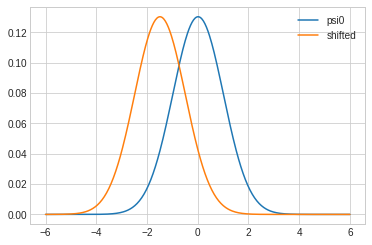

In [ ]:
psi0 = eigen_vectors[:,0]
psi_shifted = np.zeros(2*N)
for i in range(len(psi0)-50):
    psi_shifted[i] = psi0[i+50]
plt.plot(xs,psi0,label='psi0')
plt.plot(xs,psi_shifted,label='shifted')
plt.legend();

In [ ]:
psi_0 = psi_shifted
#time evolution

def Psi(t):
    sm = np.zeros(2*N,dtype='complex')
    for i in range(len(psi0)):
        psi_i = eigen_vectors[:,i]
        c = np.vdot(psi_0,psi_i)
        sm += c*psi_i*np.exp(-1j*eigen_values[i]*t)
    
    return sm

def prob(t):
    return abs(Psi(t))**2

In [ ]:
def exp_x(t):
    return xs @ prob(t) #np.dot(xs,prob)

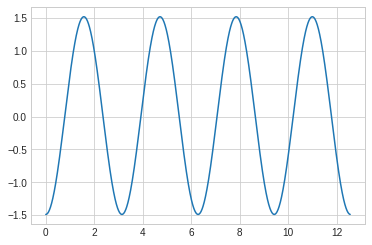

In [ ]:
def exp_x_list(ts):
    return np.array([xs @ prob(t) for t in ts])
plt.plot(ts,exp_x_list(ts))

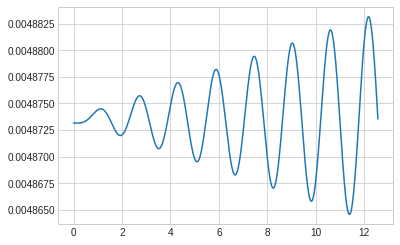

In [ ]:
uncertainity = np.array([np.std(prob(t)) for t in ts])
plt.plot(ts,uncertainity)

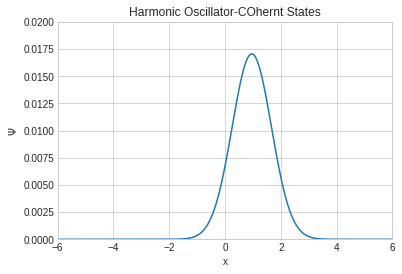

In [ ]:
fig = plt.figure()
ax = plt.axes(xlim=(-6,6),ylim=(0,0.02))
line, = plt.plot([],[])
plt.xlabel('x')
plt.ylabel(r'$\Psi$')
plt.title('Harmonic Oscillator-COhernt States')

def init():
    line.set_data(xs,prob(0))
    return line,

def animate(i):
    line.set_data(xs,prob(i*0.02))
    return line,

filename = 'trey.mp4'
an = anim(fig,frames=1000,init_func=init,func=animate,blit=True)
writervideo = animation.FFMpegWriter(fps=60)
an.save(filename, writer=writervideo)